### 신경망을 위한 데이터 표현
- 텐서(tensor)라 부르는 다차원 넘파이 베열에 데이터를 저장하는 것

---
스칼라(0D 텐서)
- 하나의 숫자만을 담고 있는 텐서를 스칼라라고 부른다
- 넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서이다
- ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있다

In [1]:
import numpy as np
x = np.array(12)

In [2]:
x

array(12)

In [3]:
x.ndim

0

---
벡터(1D 텐서)
- 5개의 원소를 가지고 있으므로 5차원 벡터라고 부른다
- 5D 벡터와 5D 텐서를 혼동하지 말자
    - 5D 벡터는 1개의 축을 따라 5개의 차원을 가진것
    - 5D텐서는 5개의 축을 가진 것 

In [5]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [7]:
x.ndim

1

---
행렬(2D텐서)
- 벡터의 배열이 행렬 또는 2D텐서이다
- 행렬에는 2개의 축이 존재 (보통은 행과 열)

In [10]:
x = np.array([[1,2,3,4],
              [2,4,5,6],
              [12,4,5,6]])
x

array([[ 1,  2,  3,  4],
       [ 2,  4,  5,  6],
       [12,  4,  5,  6]])

In [11]:
x.ndim

2

첫 번째 축에 놓여 있는 원소를 행이라 부르고, 두번쨰 축에 놓여있는 원소를 열이라 부른다  
앞의 예시에 1,2,3,4가 첫번째 행이고 첫 번째 열은 1,2,12이다

---
3D텐서와 고차원 텐서
- 이런 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있다
- 넘파이에서 3D 텐서를 나타내면 다음과 같다

In [14]:
x = np.array([[[5,78,2,34,0],
              [6,97,3,35,1],
              [7,80,4,36,2]],
              [[5,78,2,34,0],
             [6,79,3,35,1],
             [7,80,4,36,2]],
             [[5,78,2,34,0],
             [6,97,3,35,1],
             [7,80,4,36,2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 97,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 97,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [15]:
x.ndim

3

---
### 핵심 속성
- 축의 개수(랭크) : 예를 들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있다 넘파이 라이브러리에서는 ndim속성에 저장되어 있다
- 크기(shape) : 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플이다
- 데이터 타입 : 텐서에 포함된 데이터의 타입

In [21]:
from keras.datasets import mnist
(train_images,train_lables),(test_images,test_labels) = mnist.load_data()

In [23]:
print(train_images.ndim) #ndim 속성으로 축의 개수 확인

3


In [25]:
print(train_images.shape) # 배열의 크기

(60000, 28, 28)


In [27]:
print(train_images.dtype)# 데이터의 속성

uint8


이 배열은 8비트 정수형 3D 텐서이다

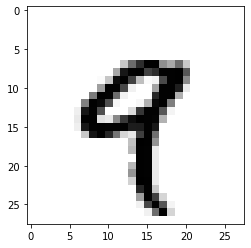

In [28]:
#3D 텐서에서 다섯 번째 샘플을 맷플롯립 라이브러리를 사용해 확인해 보자
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

---
넘파이로 텐서 조작하기
- 배열에 있는 특성 원소들을 선택하는 것을 슬라이싱이라 한다
- 넘파이 배열에서 할 수 있는 슬라이싱 연산을 살펴보자

In [30]:
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [31]:
my_slice = train_images[10:100,:,:]
my_slice.shape # 위와 같다

(90, 28, 28)

In [34]:
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape # 위와 같다

(90, 28, 28)

In [36]:
my_slice = train_images[:,14:,14:]
# 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있다
#이미지의 오른쪽 아래 14 * 14픽셀 선택
my_slice.shape

(60000, 14, 14)

In [39]:
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape
#음수 인덱스도 사용 가능 
#파이썬 리스트의 음수 인덱스와 마찬가지로 현재 축의 끝에서 상대적인 위치를 나타낸다

(60000, 14, 14)

---
배치 데이터
- 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축은 샘플 축(sample axis)이다
- MNIST 예제에서는 숫자가 이미지 샘플이다
- 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다 그 대신 데이터를 작은
  배치로 나눈다

In [41]:
# 숫자 데이터에서 크기가 128인 배치는 다음과 같다
batch = train_images[:128]

In [43]:
# 그 다음 배치
batch = train_images[128:256]

n번째 배치  
batch = train_images[128 * n:128 * (n + 1)]  
이런 배치 데이터를 다룰 때는 첫 번째 축을 배치축 또는 배치 차원이라 부른다

---
### 텐서의 실제 사례
- 벡터 데이터: (samples,features)크기의 2D 텐서
- 시계열 데이터 또는 시퀀스(sequence)데이터: (samples,timesteps.features)크기의 3D 텐서
- 이미지: (samples,height,width,channels) 또는 (samples.channels,height,widh) 크기의 4D 텐서
- 동영상: (samples,frames,height,width,channels) 또는 (samples,frames,channels,height,width) 크기의 5D 텐서


---
벡터 데이터
- 대부분의 경우에 해당된다
- 이런 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩 될 것이다
- 여기서 첫 번째 축은 샘플 축이고,두번째 축은 특성 축(feature axis)이다

2개의 예를 살펴보자
1. 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터
    - 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은(10000,3)크기의 텐서에 저장될 수 있다
2. (공통 단어 2만 개로 만든 사전)각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋
    - 각 문서는 2만 개의 원소(단어마다 원소로 대응)를 가진 벡터로 인코딩될 수 있다
    - 500개의 문서로 이루어진 전체 데이터셋은 (500,20000)크기의 텐서로 저장된다

---
### 2.2.10 시계열 데이터 또는 스퀀스 데이터
- 데이터에서 시간이 (또는 연속된 순서가) 중요할 댸는 시간 축을 포함하여 3D 텐서로 저장된다
- 각 샘플은 벡터 (2D 텐서)의 시퀀스가 인코딩 되므로 배치 데이터는 3D 텐서로 인코딩 된다
- 관례적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)
---


---
### 2.2.11 이미지 데이터
- 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어진다
- 흑백이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지는 항상 3D로 저장된다
---

---
### 2.2.12 비디오 데이터
- 비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안 되는 데이터 중 하나이다
- 예를 들어 60초짜리 144 X 256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다